# Capstone Project (Final)

## Business Problem

**London** is one of the main cities in England. It also happens to be one of the **most visited places in the U.K.** Having around 30 million people visit annually. Having a population of around 8 million and accoring to [The Week]("https://www.theweek.co.uk/london-house-prices") the number of the real estates being sold in the market have increased by around 11% before COVID-19. 

In this assignment we will be trying to figure out where is the most expensive place to live in London.
I would like to figure out if the price of the house directly relates to the amount of houses in the neighborhood.
For example if more houses are in the neighborhood, will the price of one of the houses be cheaper or more expensive? I also expect t answer the question, if you are paying more for the property or just the neighborhood?


## The Data

For this project we need the following data :

+ centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using Google   Maps API reverse geocoding 
+ number of houses/apartments and their type and location in every neighborhood will be obtained using Foursquare API
+ coordinate of Londons' neighborhoods will be obtained using Google Maps API geocoding of well known London location

### Downloading the packages

In [3]:
import os # Operating System
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes
import folium #import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


foli

## Downloading and filtering the data

In [43]:
#(Source: http://landregistry.data.gov.uk/)
df = pd.read_csv("http://prod2.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2018.csv")
df.columns = ['TUID', 'Price', 'Date_Transfer', 'Postcode', 'Prop_Type', 'Old_New', 'Duration', 'PAON', \
                  'SAON', 'Street', 'Locality', 'Town_City', 'District', 'County', 'PPD_Cat_Type', 'Record_Status']


df.head()

,TUID,Price,Date_Transfer,Postcode,Prop_Type,Old_New,Duration,PAON,SAON,Street,Locality,Town_City,District,County,PPD_Cat_Type,Record_Status
0,{7011B109-CFCB-8ED6-E053-6B04A8C075C1},280000,2018-05-29 00:00,IP1 4BS,T,N,F,261,NaN,NORWICH ROAD,NaN,IPSWICH,IPSWICH,SUFFOLK,A,A
1,{7011B109-CFCC-8ED6-E053-6B04A8C075C1},170000,2018-04-27 00:00,IP4 4BH,T,N,F,31,NaN,PARADE ROAD,NaN,IPSWICH,IPSWICH,SUFFOLK,A,A
2,{7011B109-CFCD-8ED6-E053-6B04A8C075C1},246000,2018-05-25 00:00,IP1 6NB,S,N,F,42,NaN,ELMCROFT ROAD,NaN,IPSWICH,IPSWICH,SUFFOLK,A,A
3,{7011B109-CFCE-8ED6-E053-6B04A8C075C1},180000,2018-06-08 00:00,IP3 9LZ,T,N,F,48,NaN,WYNTERTON CLOSE,NaN,IPSWICH,IPSWICH,SUFFOLK,A,A
4,{7011B109-CFCF-8ED6-E053-6B04A8C075C1},245000,2018-05-11 00:00,IP1 4BU,T,N,F,235,NaN,NORWICH ROAD,NaN,IPSWICH,IPSWICH,SUFFOLK,A,A


In [46]:
df[["Price"]].describe()

,Price
count,1.030277e+06
mean,3.494622e+05
std,1.843356e+06
min,1.000000e+00
25%,1.450000e+05
50%,2.300000e+05
75%,3.550000e+05
max,5.692000e+08


In [47]:
df['Date_Transfer'] = df['Date_Transfer'].apply(pd.to_datetime)
df.drop(df[df.Date_Transfer.dt.year < 2018].index, inplace=True)
df.sort_values(by=['Date_Transfer'],ascending=[False],inplace=True)
df

,TUID,Price,Date_Transfer,Postcode,Prop_Type,Old_New,Duration,PAON,SAON,Street,Locality,Town_City,District,County,PPD_Cat_Type,Record_Status
1005579,{8355F009-D597-55C5-E053-6B04A8C0D090},715950,2018-12-31,SE19 2QF,O,N,L,8,NaN,SYLVAN HILL,NaN,LONDON,CROYDON,GREATER LONDON,B,A
1015090,{8355F009-DACE-55C5-E053-6B04A8C0D090},1095000,2018-12-31,SW8 4EU,F,Y,L,"BROGAN HOUSE, 9",APARTMENT 76,ST JOSEPHS STREET,NaN,LONDON,WANDSWORTH,GREATER LONDON,B,A
934600,{8CAC1319-1377-0253-E053-6B04A8C08E51},100000,2018-12-31,OX2 9PL,O,N,L,171 - 173,NaN,CUMNOR HILL,NaN,OXFORD,VALE OF WHITE HORSE,OXFORDSHIRE,B,A
1017018,{8355F009-D2F6-55C5-E053-6B04A8C0D090},4600000,2018-12-31,OX2 9PL,O,N,F,LEXUS OXFORD,NaN,CUMNOR HILL,NaN,OXFORD,VALE OF WHITE HORSE,OXFORDSHIRE,B,A
1020384,{80E1AA99-0632-7BF8-E053-6C04A8C00BF2},52500,2018-12-31,SO40 3LY,O,N,F,261 - 263,NaN,SALISBURY ROAD,TOTTON,SOUTHAMPTON,NEW FOREST,HAMPSHIRE,B,A
343264,{80E1AA99-2040-7BF8-E053-6C04A8C00BF2},74000,2018-12-31,SA5 9JE,T,N,L,4,NaN,SPENCER STREET,BRYNHYFRYD,SWANSEA,SWANSEA,SWANSEA,B,A
375960,{85866A65-A674-143F-E053-6B04A8C06A15},125000,2018-12-31,ST19 5QZ,F,Y,L,9,NaN,SHAKESPEARE DRIVE,PENKRIDGE,STAFFORD,SOUTH STAFFORDSHIRE,STAFFORDSHIRE,B,A
1015092,{8355F009-DAD0-55C5-E053-6B04A8C0D090},715000,2018-12-31,SW8 4EU,F,Y,L,"BROGAN HOUSE, 9",APARTMENT 80,ST JOSEPHS STREET,NaN,LONDON,WANDSWORTH,GREATER LONDON,B,A
1015091,{8355F009-DACF-55C5-E053-6B04A8C0D090},1095000,2018-12-31,SW8 4EU,F,Y,L,"BROGAN HOUSE, 9",APARTMENT 77,ST JOSEPHS STREET,NaN,LONDON,WANDSWORTH,GREATER LONDON,B,A
1015089,{8355F009-DACD-55C5-E053-6B04A8C0D090},715000,2018-12-31,SW8 4EU,F,Y,L,"BROGAN HOUSE, 9",APARTMENT 75,ST JOSEPHS STREET,NaN,LONDON,WANDSWORTH,GREATER LONDON,B,A


In [86]:
df_lon = df[df["Town_City"] == "LONDON"]
df_lon.reset_index(drop=True, inplace = True)
df_lon

,TUID,Price,Date_Transfer,Postcode,Prop_Type,Old_New,Duration,PAON,SAON,Street,Locality,Town_City,District,County,PPD_Cat_Type,Record_Status
0,{8355F009-D597-55C5-E053-6B04A8C0D090},715950,2018-12-31,SE19 2QF,O,N,L,8,NaN,SYLVAN HILL,NaN,LONDON,CROYDON,GREATER LONDON,B,A
1,{8355F009-DACE-55C5-E053-6B04A8C0D090},1095000,2018-12-31,SW8 4EU,F,Y,L,"BROGAN HOUSE, 9",APARTMENT 76,ST JOSEPHS STREET,NaN,LONDON,WANDSWORTH,GREATER LONDON,B,A
2,{8355F009-DAD0-55C5-E053-6B04A8C0D090},715000,2018-12-31,SW8 4EU,F,Y,L,"BROGAN HOUSE, 9",APARTMENT 80,ST JOSEPHS STREET,NaN,LONDON,WANDSWORTH,GREATER LONDON,B,A
3,{8355F009-DACF-55C5-E053-6B04A8C0D090},1095000,2018-12-31,SW8 4EU,F,Y,L,"BROGAN HOUSE, 9",APARTMENT 77,ST JOSEPHS STREET,NaN,LONDON,WANDSWORTH,GREATER LONDON,B,A
4,{8355F009-DACD-55C5-E053-6B04A8C0D090},715000,2018-12-31,SW8 4EU,F,Y,L,"BROGAN HOUSE, 9",APARTMENT 75,ST JOSEPHS STREET,NaN,LONDON,WANDSWORTH,GREATER LONDON,B,A
5,{8355F009-4092-55C5-E053-6B04A8C0D090},966705,2018-12-31,N1C 4PF,F,Y,L,98,FLAT 50,CAMLEY STREET,NaN,LONDON,CAMDEN,GREATER LONDON,A,A
6,{8355F009-40A8-55C5-E053-6B04A8C0D090},987972,2018-12-31,N1C 4PF,F,Y,L,98,FLAT 66,CAMLEY STREET,NaN,LONDON,CAMDEN,GREATER LONDON,A,A
7,{8355F009-40A7-55C5-E053-6B04A8C0D090},1032852,2018-12-31,N1C 4PF,F,Y,L,98,FLAT 69,CAMLEY STREET,NaN,LONDON,CAMDEN,GREATER LONDON,A,A
8,{8355F009-40A4-55C5-E053-6B04A8C0D090},1070000,2018-12-31,N1C 4PF,F,Y,L,98,FLAT 44,CAMLEY STREET,NaN,LONDON,CAMDEN,GREATER LONDON,A,A
9,{85866A65-8EF7-143F-E053-6B04A8C06A15},671837,2018-12-31,N1 7JL,F,N,L,"ANGEL WHARF, 164",FLAT 7,SHEPHERDESS WALK,NaN,LONDON,HACKNEY,GREATER LONDON,B,A


#### Still filtering the data

In [101]:
df_dist = df_lon.groupby(['District'])['Price'].describe().reset_index()
df_dist.drop_duplicates(subset ="District", keep = 'last', inplace = True) 
df_dist.columns = ['District', 'Count', 'Average Price', 'Standard Deviation', 'Min price', 'Quartile One', 'Median', 'Quartile Three', 'Max Price']
df_dist

,District,Count,Average Price,Standard Deviation,Min price,Quartile One,Median,Quartile Three,Max Price
0,BARKING AND DAGENHAM,1.0,4.170000e+05,NaN,417000.0,417000.0,417000.0,417000.0,417000.0
1,BARNET,3679.0,7.632870e+05,2.250893e+06,500.0,365312.5,499000.0,746500.0,67586207.0
2,BEXLEY,181.0,3.117168e+05,1.228739e+05,10000.0,230000.0,285000.0,390000.0,775000.0
3,BRENT,1910.0,7.025445e+05,1.471589e+06,1000.0,347000.0,486000.0,655000.0,42800000.0
4,BROMLEY,791.0,4.174107e+05,5.185404e+05,1000.0,275000.0,363000.0,465000.0,12536000.0
5,CAMDEN,2468.0,1.882118e+06,8.860498e+06,100.0,505000.0,770697.5,1350000.0,302000000.0
6,CITY OF LONDON,522.0,4.914300e+06,1.655710e+07,3076.0,706250.0,921540.0,1600000.0,141063596.0
7,CITY OF WESTMINSTER,3316.0,3.559898e+06,1.654799e+07,100.0,534625.0,975000.0,2150000.0,569200000.0
8,CROYDON,993.0,3.982777e+05,2.196318e+05,1000.0,275000.0,370000.0,480000.0,2720000.0
9,EALING,2209.0,7.301699e+05,1.287433e+06,500.0,400000.0,550000.0,796000.0,36250000.0


In [102]:
df_dist_2 = df_dist.query("Count > 1").reset_index()
df_dist_2

,index,District,Count,Average Price,Standard Deviation,Min price,Quartile One,Median,Quartile Three,Max Price
0,1,BARNET,3679.0,7.632870e+05,2.250893e+06,500.0,365312.5,499000.0,746500.0,67586207.0
1,2,BEXLEY,181.0,3.117168e+05,1.228739e+05,10000.0,230000.0,285000.0,390000.0,775000.0
2,3,BRENT,1910.0,7.025445e+05,1.471589e+06,1000.0,347000.0,486000.0,655000.0,42800000.0
3,4,BROMLEY,791.0,4.174107e+05,5.185404e+05,1000.0,275000.0,363000.0,465000.0,12536000.0
4,5,CAMDEN,2468.0,1.882118e+06,8.860498e+06,100.0,505000.0,770697.5,1350000.0,302000000.0
5,6,CITY OF LONDON,522.0,4.914300e+06,1.655710e+07,3076.0,706250.0,921540.0,1600000.0,141063596.0
6,7,CITY OF WESTMINSTER,3316.0,3.559898e+06,1.654799e+07,100.0,534625.0,975000.0,2150000.0,569200000.0
7,8,CROYDON,993.0,3.982777e+05,2.196318e+05,1000.0,275000.0,370000.0,480000.0,2720000.0
8,9,EALING,2209.0,7.301699e+05,1.287433e+06,500.0,400000.0,550000.0,796000.0,36250000.0
9,10,ENFIELD,1583.0,5.478330e+05,1.983301e+06,900.0,300500.0,390000.0,560000.0,72000000.0


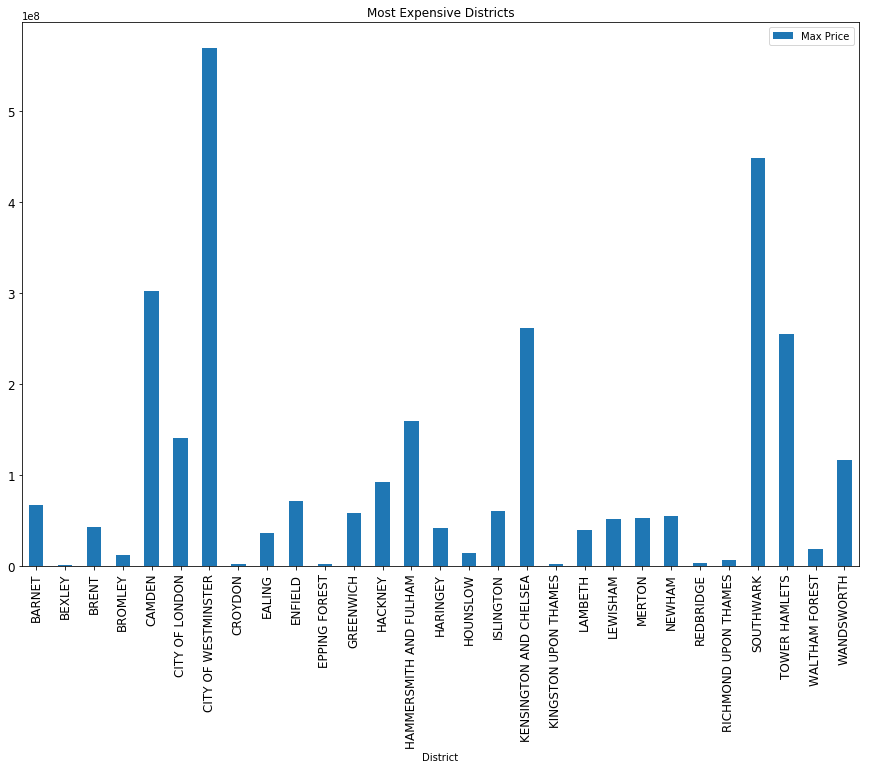

In [103]:
%matplotlib inline

df_max = df_dist_2[["District", "Max Price"]]
df_max.plot.bar(x='District', rot=90, title='Most Expensive Districts', figsize=(15,10), fontsize=12)

## Finding the coorelation between price and neighborhood

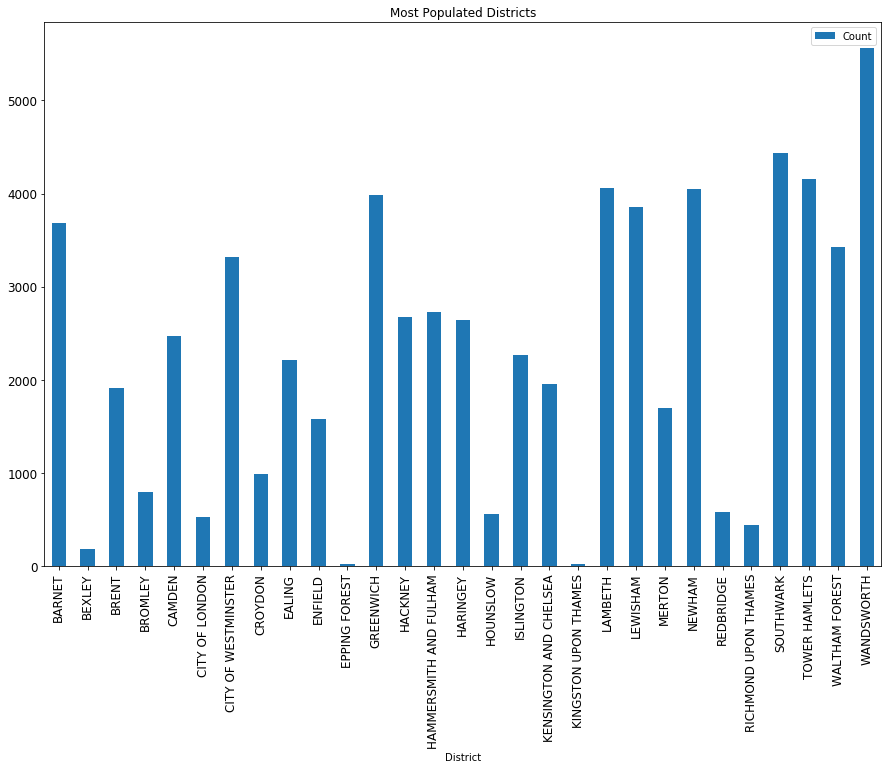

In [104]:
%matplotlib inline

df_count = df_dist_2[["District", "Count"]]
df_count.plot.bar(x='District', rot=90, title='Most Populated Districts', figsize=(15,10), fontsize=12)

## K-means Clustering

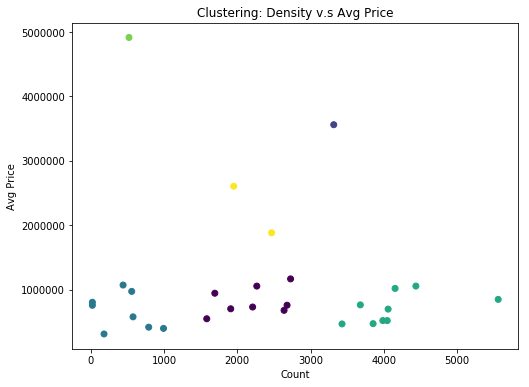

In [118]:
%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

df_price = df_dist_2[["Count", "Average Price"]]

model = KMeans(n_clusters=6)

model = model.fit(scale(df_price))

plt.figure(figsize=(8, 6))
plt.scatter(df_price["Count"], df_price["Average Price"], c=model.labels_.astype(float))
plt.title('Clustering: Density v.s Avg Price')
plt.xlabel('Count')
plt.ylabel('Avg Price')
#plt.annotate("District", (Count,Avg_Price))
plt.show()

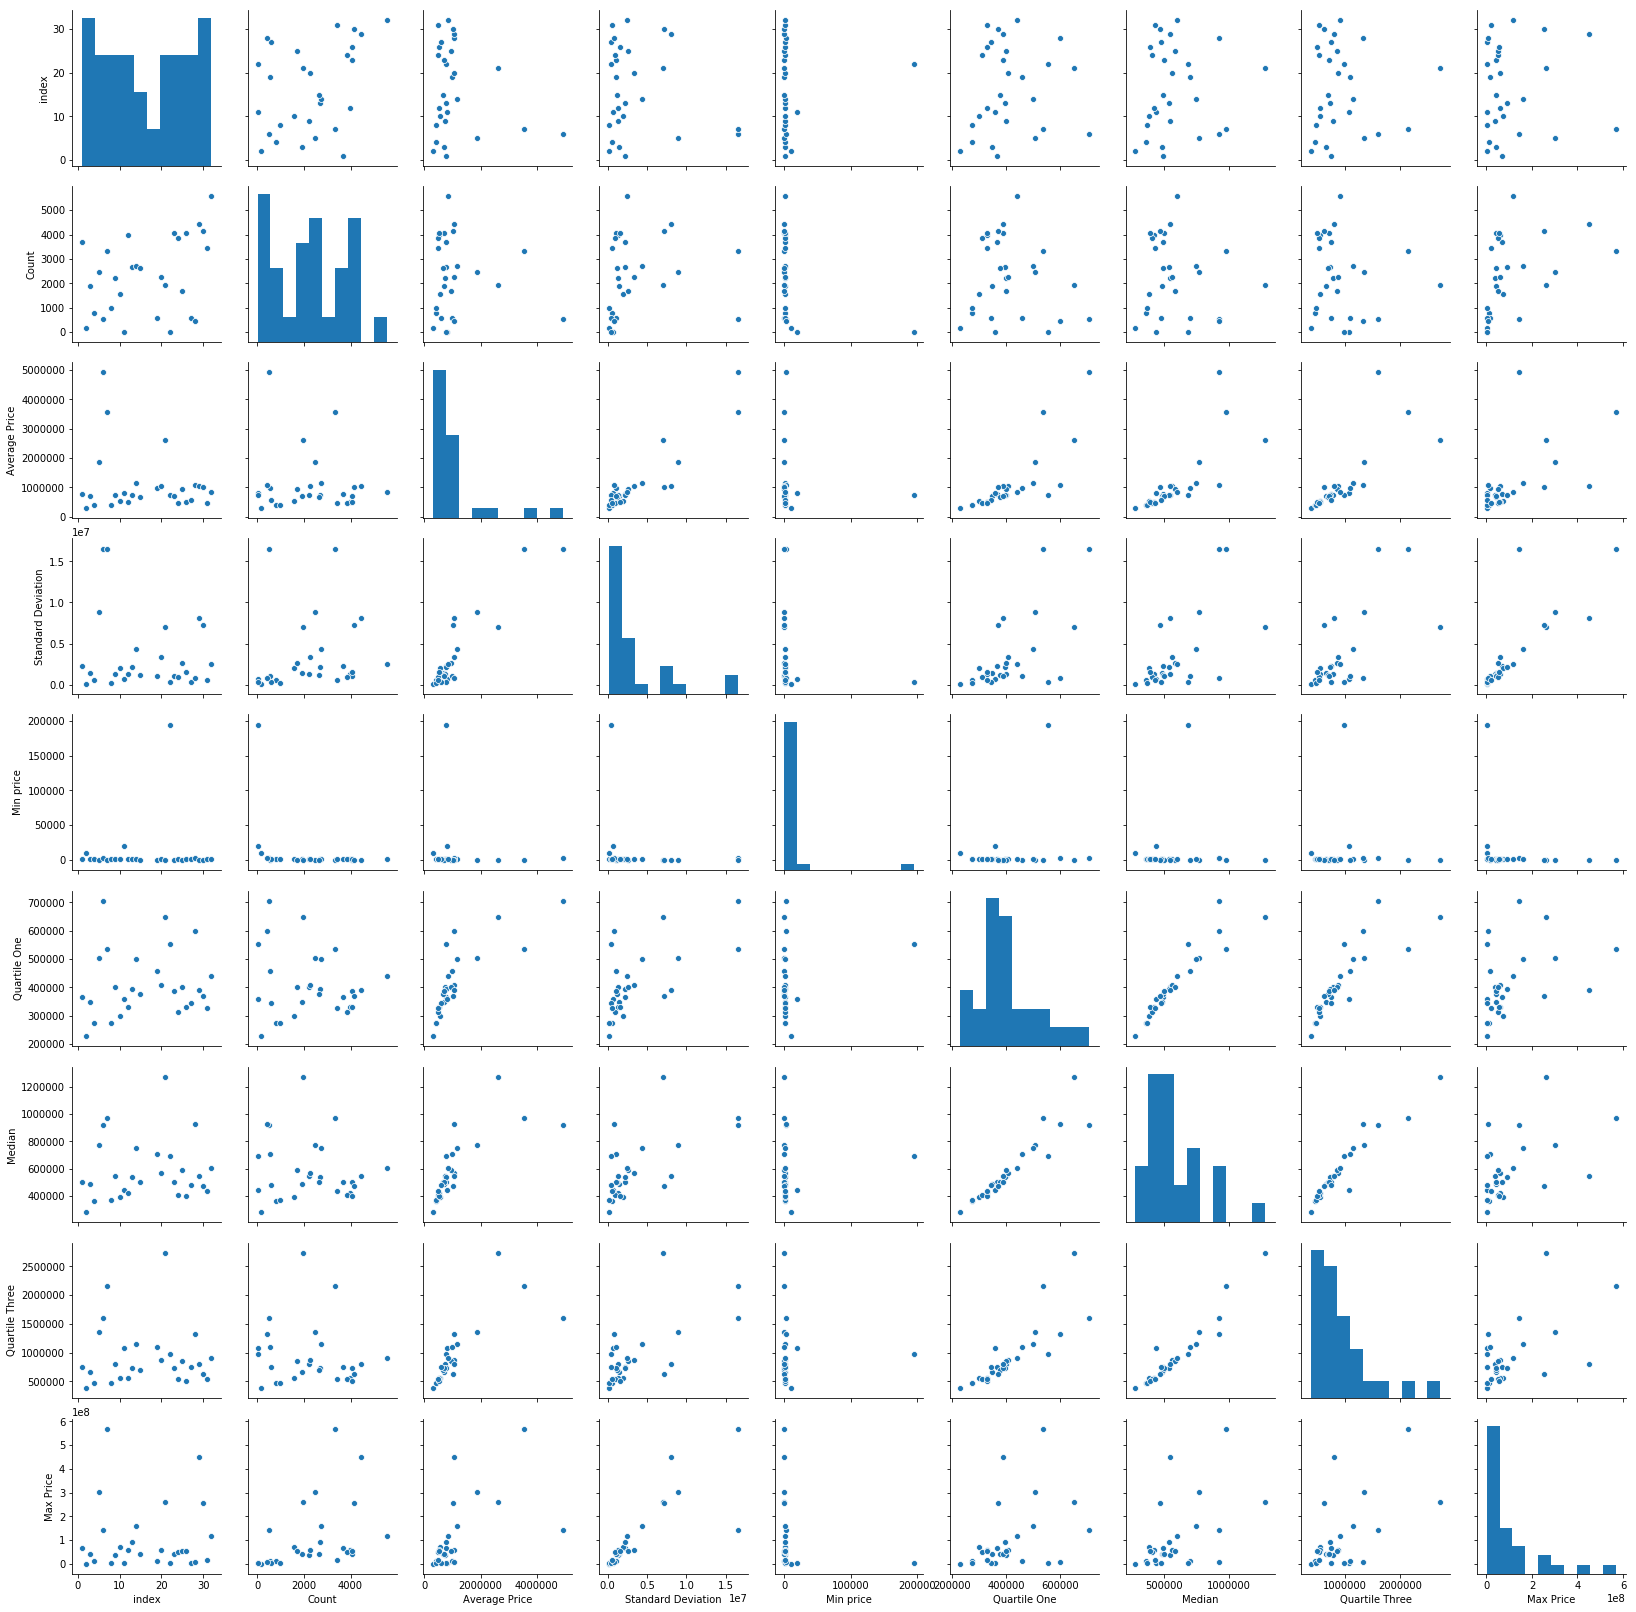

In [119]:
import seaborn as sns

g = sns.pairplot(df_dist_2)

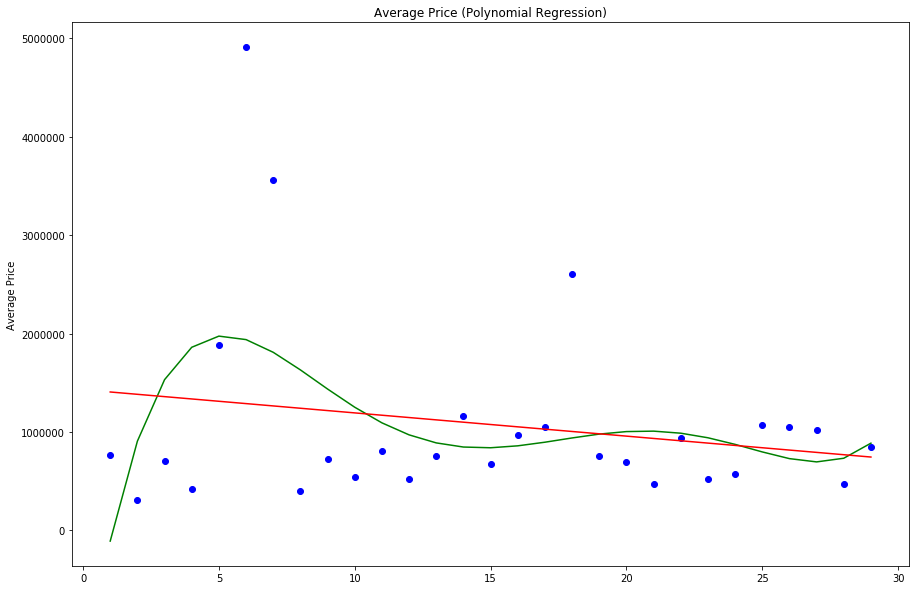

R-Squared error for both models:
0.19982461532798512
0.040031987757359166


In [126]:
from pylab import *
from sklearn.metrics import r2_score


x = np.linspace(1, 29, 29)
y = df_price["Average Price"]

p_regress = np.poly1d(np.polyfit(x, y, 5))
p_regress2 = np.poly1d(np.polyfit(x, y, 1))

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, c="blue")
plt.plot(x, p_regress(x), c='green')
plt.plot(x, p_regress2(x), c='red')


plt.title('Average Price (Polynomial Regression)')
plt.ylabel('Average Price')
plt.show()

r2_lebron = r2_score(y, p_regress(x))
r2_lowry = r2_score(y, p_regress2(x))

print("R-Squared error for both models:")
print(r2_lebron)
print(r2_lowry)

# Results and Discussion



First, we may examine them according to neighborhoods/London areas. It is interesting to note that, although West London (Notting Hill, Kensington, Chelsea, Marylebone) and North-West London (Hampsted) might be considered highly profitable venues to purchase a real estate according to amenities and essential facilities surrounding such venues i.e. elementary schools, high schools, hospitals & grocery stores, South-West London (Wandsworth, Balham) and North-West London (Isliington) are arising as next future elite venues with a wide range of amenities and facilities. Accordingly, one might target under-priced real estates in these areas of London in order to make a business affair.

Secondly, it's interesting that there is no direct correlation between expensivness of the house and population density of the neighborhood. I thought that the less populated neighborhoods would mean that the house prices would be higher due to the extra privacy and perhaps it could've meant the houses were bigger. However, I was completely wrong as most of the places that were more expensive were closer to the city center where all the restauraunts and amenities are. In fact, the less expensive neighborhoods in London had a less dense population.


# Conclusion

First, we gathered data on London properties and the relative price paid data were extracted from the HM Land Registry (http://landregistry.data.gov.uk/). We did this to explore and target recommended locations across different venues according to the presence of amenities and essential facilities, we accessed data through FourSquare API interface and arranged them as a data frame for visualization. By merging data on London properties and the relative price paid data from the HM Land Registry and data on amenities and essential facilities surrounding such properties from FourSquare API interface, we were able to recommend profitable real estate areas.

Second, The Methodology section comprised four stages: 1. Collect Inspection Data; 2. Explore and Understand Data; 3. Data preparation and preprocessing; 4. Modeling. In particular, in the modeling section, we used the k-means clustering technique as it is fast and efficient in terms of computational cost, is highly flexible to account for mutations in real estate market in London and is accurate.

Finally, we drew the conclusion that even though the London Housing Market may be difficult to navigate, it is still possible to use clustering to find the reults quite quickly. We also find that you are mostly paying to live in the neighborhood with the amenities that perticular neighborhood will give you; as some of the houses that were still expensive were smaller than the ones in the less expensive neighborhoods.As well we discovered that there is no correlation between population density and expensiveness of the huse, BUT there is a correlation between expensiveness of the house and proximity to amenities.